# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [52]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-11-04 11:28:19--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.04s   

2023-11-04 11:28:20 (1.26 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [54]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,47,85,42,66,122,54,6,148,46,19,141,172,317,174,88,6,14,180,182
1,494,106,54,105,164,48,5,247,27,27,165,269,891,243,84,12,1,181,182
2,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
3,99,87,44,65,124,56,6,149,46,19,144,170,321,171,87,4,12,179,182
4,320,105,54,100,220,69,10,221,30,25,170,232,718,202,73,0,13,187,199
5,448,101,53,91,194,65,6,204,32,23,161,231,636,214,78,5,14,192,192
6,763,102,52,98,225,71,10,214,31,24,164,228,682,199,71,0,16,187,196
7,276,83,46,73,137,59,6,148,45,19,146,167,327,183,75,8,0,185,191
8,87,86,37,60,115,54,5,119,56,17,132,141,209,129,72,2,8,186,190
9,450,91,46,75,185,75,7,154,42,19,147,178,362,192,72,8,8,192,199


Methods `describe` and `info` deliver some useful information.

In [55]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,429.469945,93.683060,44.954463,82.041894,169.852459,62.078324,8.703097,168.91439,40.845173,20.588342,148.193078,188.690346,439.859745,175.156648,72.555556,6.344262,12.242259,189.049180,195.819672
std,244.230808,8.077505,6.080341,15.855531,33.854159,8.395953,5.157130,32.57672,7.712659,2.544124,14.450743,30.954504,172.728005,31.929797,7.866073,4.844655,8.852891,6.257502,7.482479
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.00000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.00000,33.000000,19.000000,138.000000,168.000000,320.000000,150.000000,67.000000,3.000000,5.000000,185.000000,191.000000
50%,438.000000,93.000000,45.000000,80.000000,169.000000,62.000000,8.000000,157.00000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,646.000000,100.000000,50.000000,98.000000,197.000000,66.000000,10.000000,198.00000,46.000000,23.000000,160.000000,217.000000,586.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,115.000000,58.000000,112.000000,333.000000,138.000000,55.000000,257.00000,61.000000,28.000000,188.000000,320.000000,968.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [56]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [57]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [58]:
# давайте применим нормализацию min-max, чтобы сделать максимум и минимум для общих функций одинаковыми
# в наших данных нет нулей.
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_pd.values)
X_test_normalized = scaler.transform(X_test)

# давайте также применим преобразование Йео-Джонсона, чтобы данные выглядели более нормально
pt = PowerTransformer()
X_train_final = pt.fit_transform(X_train_normalized)
X_test_final = pt.transform(X_test_normalized)

In [59]:
pd.DataFrame(X_train_final).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,-1.030546e-15,-1.676053e-15,1.786064e-15,-2.014175e-15,8.105235e-16,4.080120e-15,-9.386541e-15,1.828127e-15,-4.812989e-15,-1.177281e-14,-7.927276e-17,-1.659874e-15,4.804900e-16,1.954316e-15,-3.643311e-15,3.235623e-17,-1.553099e-16,3.423289e-15,4.762837e-15
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.787095e+00,-3.054285e+00,-2.217807e+00,-2.851380e+00,-2.186196e+00,-3.315749e+00,-4.207542e+00,-2.370901e+00,-2.029300e+00,-1.934598e+00,-2.320695e+00,-2.455838e+00,-2.195468e+00,-2.316581e+00,-2.838270e+00,-1.625408e+00,-1.805576e+00,-2.294380e+00,-1.837351e+00
25%,-8.705753e-01,-6.743355e-01,-7.950103e-01,-7.477476e-01,-7.759702e-01,-6.960956e-01,-4.308402e-01,-6.122598e-01,-1.018703e+00,-5.391591e-01,-6.794034e-01,-6.206647e-01,-6.438876e-01,-7.691225e-01,-7.596092e-01,-6.417007e-01,-8.288434e-01,-6.190179e-01,-6.902889e-01
50%,4.709641e-02,-2.030031e-02,7.390653e-02,-1.020688e-01,3.984594e-02,1.787287e-01,3.268960e-02,-2.336692e-01,3.090515e-01,-3.186152e-02,-9.907232e-02,-2.042718e-01,-2.549008e-01,2.088420e-02,-3.608517e-02,1.107398e-01,4.741267e-02,4.146854e-02,1.032297e-01
75%,8.887873e-01,8.109938e-01,8.526448e-01,1.006516e+00,8.310926e-01,7.386109e-01,7.777308e-01,9.623879e-01,6.858276e-01,1.039961e+00,8.365542e-01,9.661780e-01,9.848127e-01,7.452348e-01,6.698465e-01,7.031972e-01,8.012318e-01,6.614927e-01,6.739445e-01
max,1.676319e+00,2.337373e+00,1.955386e+00,1.828104e+00,3.801623e+00,3.656415e+00,3.270689e+00,2.068433e+00,2.452686e+00,2.027761e+00,2.472628e+00,2.908245e+00,2.029090e+00,2.575386e+00,3.183680e+00,2.260570e+00,2.225420e+00,2.457821e+00,2.240619e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV

In [61]:
param_grid = {'penalty': ['l2', 'l1'], 'C': [1, 10, 100, 1000]}

reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# ищем и выбираем лучшие параметры с помощью кросс валидации
clf = GridSearchCV(reg, param_grid, scoring=['f1_macro', 'accuracy'], cv=5, refit='f1_macro')
clf.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l2', 'l1']},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

In [62]:
best_estimator = clf.best_estimator_

Лучшая метрика f1-macro

In [63]:
clf.best_score_

0.7970031570918301

Лучшие параметры

In [64]:
best_logreg_params = clf.best_params_

In [65]:
best_logreg_params

{'C': 10, 'penalty': 'l2'}

In [66]:
! pip install scikit-plot

Наконец строим график ROC, чтобы посмтотреть разделимость классов моделью

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

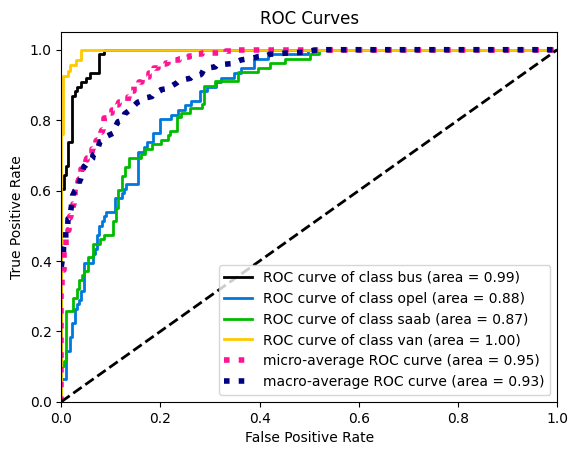

In [67]:
import scikitplot

scikitplot.metrics.plot_roc(y_test, best_estimator.predict_proba(X_test_final))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [68]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [69]:
pca = PCA(svd_solver='full')
pca.fit(X_train_final)

PCA(svd_solver='full')

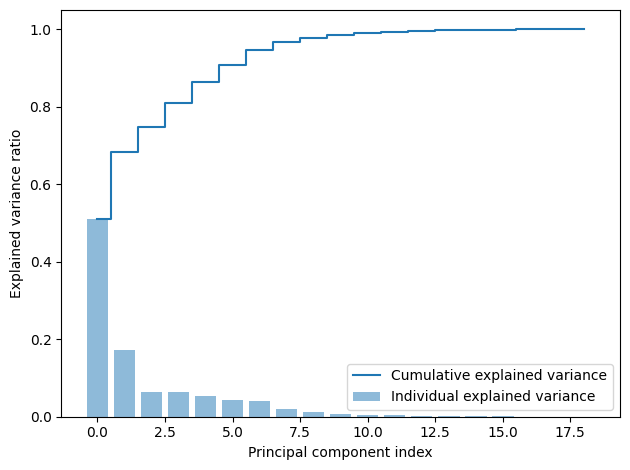

In [70]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Строим график объесняемой дисперсии в зависимости от номера компоненты
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [71]:
# наши данные уже были нормализованы во время предварительной обработки

# Согласно дисперсионному графику мы бы выбрали 2 компоненты
# потому что 2 компонентs описывают около 0,7 общей дисперсии.
# мы также можем взять около 5 компонентов для описания дисперсии ~0,85
# но мы должны постараться сделать нашу модель максимально простой

pca = PCA(n_components=2, svd_solver='full')
pca.fit(X_train_final)

X_train_pca = pca.transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [72]:
param_grid = {'penalty': ['l2', 'l1'], 'C': [1, 10, 100, 1000]}

reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# делаем ту же кросс валидацию
clf = GridSearchCV(reg, param_grid, scoring=['f1_macro', 'accuracy'], cv=5, refit='f1_macro')
clf.fit(X_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l2', 'l1']},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

In [73]:
best_estimator_pca = clf.best_estimator_

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

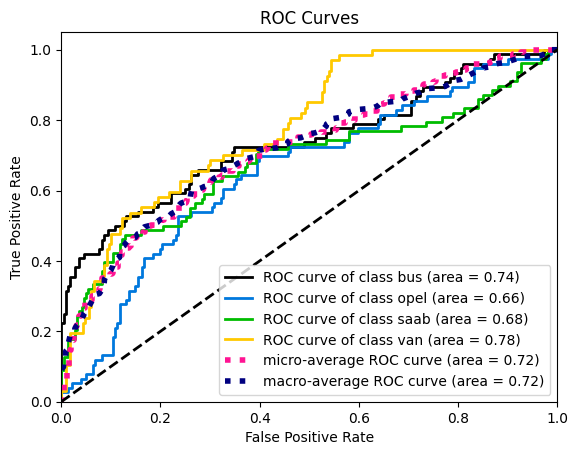

In [74]:
scikitplot.metrics.plot_roc(y_test, best_estimator_pca.predict_proba(X_test_pca))

Здесь вы можете заметить, что качество классификации значительно хуже по двум компонентам, чем при использовании всех признаков.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [75]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [100*i for i in range(1, 21)]}

tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, param_grid, scoring=['f1_macro', 'accuracy'], cv=5, refit='f1_macro')

clf.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [100, 200, 300, 400, 500, 600, 700, 800,
                                       900, 1000, 1100, 1200, 1300, 1400, 1500,
                                       1600, 1700, 1800, 1900, 2000]},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

In [76]:
tree_best_params = clf.best_params_

In [77]:
tree_best_params

{'criterion': 'entropy', 'max_depth': 1400}

In [78]:
clf.best_score_

0.7181422095216474

In [79]:
best_tree = clf.best_estimator_

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

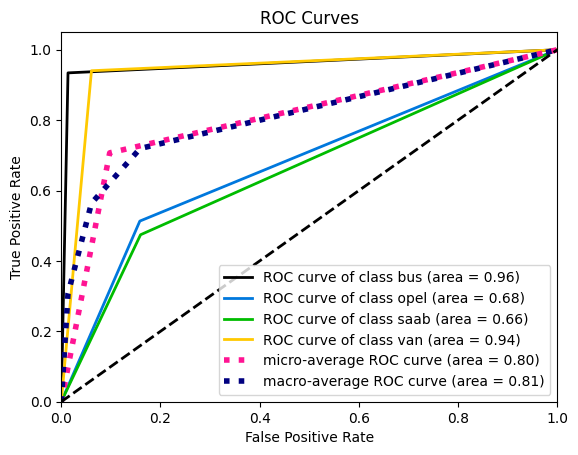

In [80]:
scikitplot.metrics.plot_roc(y_test, best_tree.predict_proba(X_test_final))

Это хуже, чем использование LogisticReg для всех фич, но лучше, чем использование LogReg с PCA для двух компонент.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [81]:
from sklearn.ensemble import BaggingClassifier

In [82]:
# модели плохо сходились, чтобы не было ворнингов ипротим
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)

In [83]:
param_grid = {'n_estimators': [2+5*i  if (2+5*i) <= 100 else 100 for i in range(1, 20)],
              'estimator': [reg, DecisionTreeClassifier(max_depth=1500)]}

ensemble = BaggingClassifier()
clf = GridSearchCV(ensemble, param_grid, scoring=['f1_macro', 'accuracy'], cv=5, refit='f1_macro')
clf.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'estimator': [LogisticRegression(max_iter=500,
                                                          multi_class='multinomial',
                                                          solver='saga',
                                                          tol=0.001),
                                       DecisionTreeClassifier(max_depth=1500)],
                         'n_estimators': [7, 12, 17, 22, 27, 32, 37, 42, 47, 52,
                                          57, 62, 67, 72, 77, 82, 87, 92, 97]},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

In [84]:
clf.best_params_

{'estimator': LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga',
                    tol=0.001),
 'n_estimators': 27}

In [85]:
clf.best_score_

0.7679469522640445

In [86]:
bagging_best = clf.best_estimator_

In [87]:
df = pd.DataFrame(clf.cv_results_)

Более подробные результаты кросс валидации:

In [88]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_n_estimators,params,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,...,std_test_f1_macro,rank_test_f1_macro,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.643276,0.302170,0.006304,0.000297,"LogisticRegression(max_iter=500, multi_class='...",7,"{'estimator': LogisticRegression(max_iter=500,...",0.737862,0.825668,0.719606,...,0.035930,4,0.745455,0.827273,0.718182,0.763636,0.770642,0.765038,0.036015,5
1,0.763948,0.190161,0.009017,0.003134,"LogisticRegression(max_iter=500, multi_class='...",12,"{'estimator': LogisticRegression(max_iter=500,...",0.740255,0.835115,0.699653,...,0.045588,3,0.745455,0.836364,0.700000,0.790909,0.770642,0.768674,0.045465,2
2,2.070932,1.242932,0.013449,0.006302,"LogisticRegression(max_iter=500, multi_class='...",17,"{'estimator': LogisticRegression(max_iter=500,...",0.756741,0.772070,0.714739,...,0.026443,6,0.763636,0.772727,0.718182,0.790909,0.779817,0.765054,0.025077,4
3,2.218165,0.338433,0.023308,0.010025,"LogisticRegression(max_iter=500, multi_class='...",22,"{'estimator': LogisticRegression(max_iter=500,...",0.758948,0.795304,0.707620,...,0.030250,10,0.763636,0.800000,0.709091,0.781818,0.752294,0.761368,0.030760,11
4,2.539870,0.709459,0.023838,0.018052,"LogisticRegression(max_iter=500, multi_class='...",27,"{'estimator': LogisticRegression(max_iter=500,...",0.737916,0.816323,0.717882,...,0.036557,1,0.745455,0.818182,0.718182,0.800000,0.770642,0.770492,0.036079,1


In [89]:
n_estimators = [2+5*i  if (2+5*i) <= 100 else 100 for i in range(1, 20)]
n = len(n_estimators)
accuracy_arr = clf.cv_results_['mean_test_accuracy'][:n]
f1_arr = clf.cv_results_['mean_test_f1_macro'][:n]

# and we also should add std
accuracy_arr_upper = accuracy_arr + clf.cv_results_['std_test_accuracy'][:n]
accuracy_arr_lower = accuracy_arr - clf.cv_results_['std_test_accuracy'][:n]

f1_arr_upper = f1_arr + clf.cv_results_['std_test_f1_macro'][:n]
f1_arr_lower = f1_arr - clf.cv_results_['std_test_f1_macro'][:n]

Размнытые области описывают возможные колебания метрик

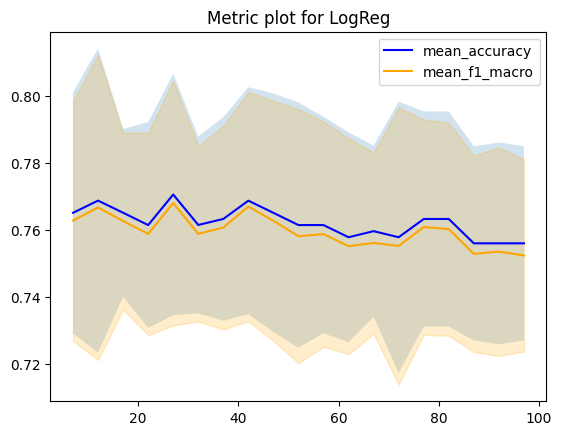

In [90]:
plt.title('Metric plot for LogReg')
plt.plot(n_estimators, accuracy_arr, label='mean_accuracy', color='blue')
plt.fill_between(n_estimators, accuracy_arr_lower, accuracy_arr_upper, alpha=0.2)

plt.plot(n_estimators, f1_arr, label='mean_f1_macro', color='orange')
plt.fill_between(n_estimators, f1_arr_lower, f1_arr_upper, color='orange', alpha=0.2)

plt.legend()

In [91]:
n_estimators = [2+5*i  if (2+5*i) <= 100 else 100 for i in range(1, 20)]
n = len(n_estimators)
accuracy_arr = clf.cv_results_['mean_test_accuracy'][n:]
f1_arr = clf.cv_results_['mean_test_f1_macro'][n:]

# and we also should add std
accuracy_arr_upper = accuracy_arr + clf.cv_results_['std_test_accuracy'][n:]
accuracy_arr_lower = accuracy_arr - clf.cv_results_['std_test_accuracy'][n:]

f1_arr_upper = f1_arr + clf.cv_results_['std_test_f1_macro'][n:]
f1_arr_lower = f1_arr - clf.cv_results_['std_test_f1_macro'][n:]

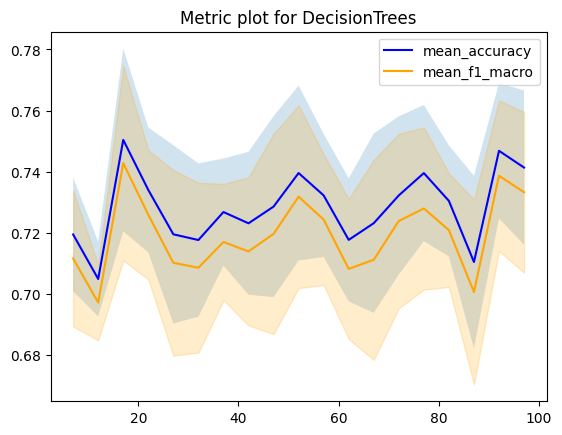

In [92]:
plt.title('Metric plot for DecisionTrees')
plt.plot(n_estimators, accuracy_arr, label='mean_accuracy', color='blue')
plt.fill_between(n_estimators, accuracy_arr_lower, accuracy_arr_upper, alpha=0.2)

plt.plot(n_estimators, f1_arr, label='mean_f1_macro', color='orange')
plt.fill_between(n_estimators, f1_arr_lower, f1_arr_upper, color='orange', alpha=0.2)

plt.legend()

Как вы можете видеть, для нашиъ данных предпочтительнее использовать LogReg. Наилучшее количество estimators — 22.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [93]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [2 + 5*i for i in range(20)]}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid, scoring=['f1_macro', 'accuracy'], cv=5, refit=False)

clf.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97]},
             refit=False, scoring=['f1_macro', 'accuracy'])

In [94]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_f1_macro', 'split1_test_f1_macro', 'split2_test_f1_macro', 'split3_test_f1_macro', 'split4_test_f1_macro', 'mean_test_f1_macro', 'std_test_f1_macro', 'rank_test_f1_macro', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'])

In [95]:
accuracy_arr = clf.cv_results_['mean_test_accuracy']
f1_arr = clf.cv_results_['mean_test_f1_macro']
n_estimators = [2 + 5*i for i in range(20)]

# and we also should add std
accuracy_arr_upper = accuracy_arr + clf.cv_results_['std_test_accuracy']
accuracy_arr_lower = accuracy_arr - clf.cv_results_['std_test_accuracy']

f1_arr_upper = f1_arr + clf.cv_results_['std_test_f1_macro']
f1_arr_lower = f1_arr - clf.cv_results_['std_test_f1_macro']

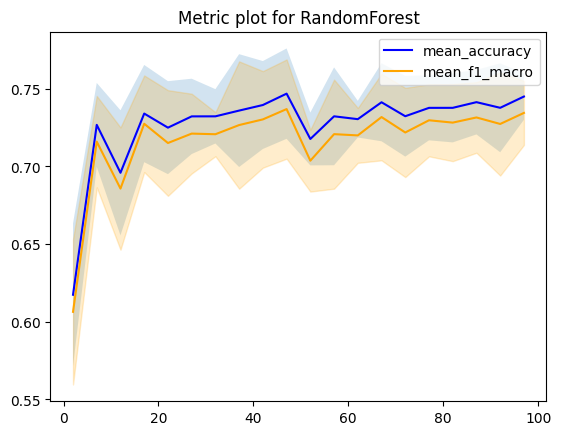

In [96]:
plt.plot(n_estimators, accuracy_arr, label='mean_accuracy', color='blue')
plt.fill_between(n_estimators, accuracy_arr_lower, accuracy_arr_upper, alpha=0.2)

plt.plot(n_estimators, f1_arr, label='mean_f1_macro', color='orange')
plt.fill_between(n_estimators, f1_arr_lower, f1_arr_upper, color='orange', alpha=0.2)
plt.title('Metric plot for RandomForest')

plt.legend()

Оптимальное количество estimators на основе среднего значения f1_macro

In [97]:
best_n_estimators_rf = n_estimators[f1_arr.argmax()]
best_n_estimators_rf

47

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [98]:
from sklearn.metrics import f1_score, accuracy_score

In [99]:
X_train_final[0:50].shape

(50, 19)

In [100]:
parts = np.linspace(0, X_train_final.shape[0], 11).astype('int64')

results = {'num_parts': [], 'rf_accuracy_test': [], 'tree_accuracy_test': [], 'reg_accuracy_test': [],
           'rf_f1_macro_test': [], 'tree_f1_macro_test': [], 'reg_f1_macro_test': []}

for i, idx in enumerate(parts):
  if idx == 0:
    continue
  results['num_parts'].append(i)
  reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, **best_logreg_params)
  tree = DecisionTreeClassifier(**tree_best_params)
  rf = RandomForestClassifier(n_estimators=best_n_estimators_rf)

  X_train_part = X_train_final[0:idx]
  y_train_part = y_train[0:idx]

  for model in [reg, tree, rf]:
    model.fit(X_train_part, y_train_part)

  for key, model in {'reg': reg, 'tree': tree, 'rf': rf}.items():
    prediction = model.predict(X_test_final)
    acc = accuracy_score(y_test, prediction)
    f1 = f1_score(y_test, prediction, average='macro')

    results[f'{key}_f1_macro_test'].append(f1)
    results[f'{key}_accuracy_test'].append(acc)

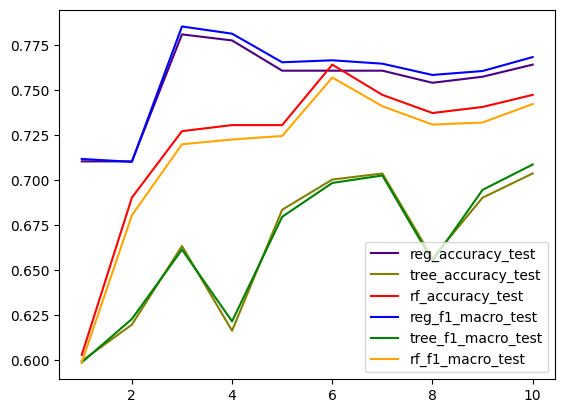

In [101]:
x = results['num_parts']

for model, color in zip(['reg', 'tree', 'rf'], ['indigo', 'olive', 'red']):
  plt.plot(x, results[f'{model}_accuracy_test'], color=color, label=f'{model}_accuracy_test')

for model, color in zip(['reg', 'tree', 'rf'], ['blue', 'green', 'orange']):
  plt.plot(x, results[f'{model}_f1_macro_test'], color=color, label=f'{model}_f1_macro_test')

plt.legend()

Как видите, увеличение количества образцов поездов увеличивает общие показатели, но есть некоторые холмы и ямы. Возможно, в наборе данных есть данные низкого качества.